In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def bias(y, z):
    return (y - z)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [9]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [10]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [10]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [12]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1113.5800911159076
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4777.329108044025


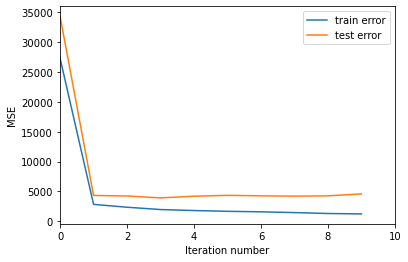

In [13]:
get_error_plot(n_trees, train_errors, test_errors)

In [11]:
n_trees = 30
coefs = [1] * n_trees

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [12]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 214.75130852293333
Ошибка алгоритма из 30 деревьев глубиной 3     с шагом 1 на тестовой выборке: 7008.94796178784


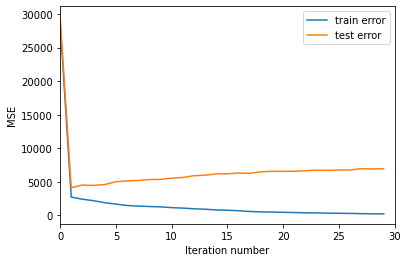

In [13]:
get_error_plot(n_trees, train_errors, test_errors)

In [14]:
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [15]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1809.9583360087006
Ошибка алгоритма из 30 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3449.9120970238964


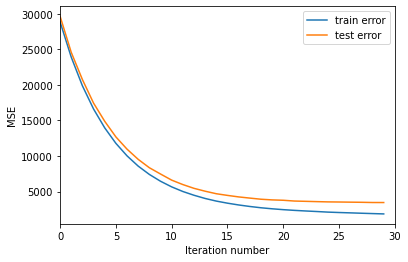

In [16]:
get_error_plot(n_trees, train_errors, test_errors)

In [17]:
eta = 0.01

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [18]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 17024.549061477654
Ошибка алгоритма из 30 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 17864.78495310036


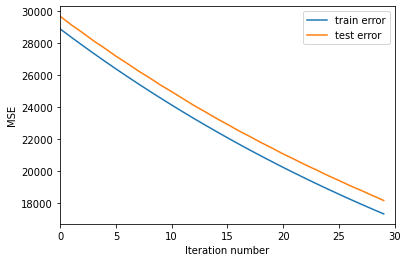

In [19]:
get_error_plot(n_trees, train_errors, test_errors)

#### Домашнее задание

In [47]:
n_trees = 150
coefs = [1] * n_trees

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

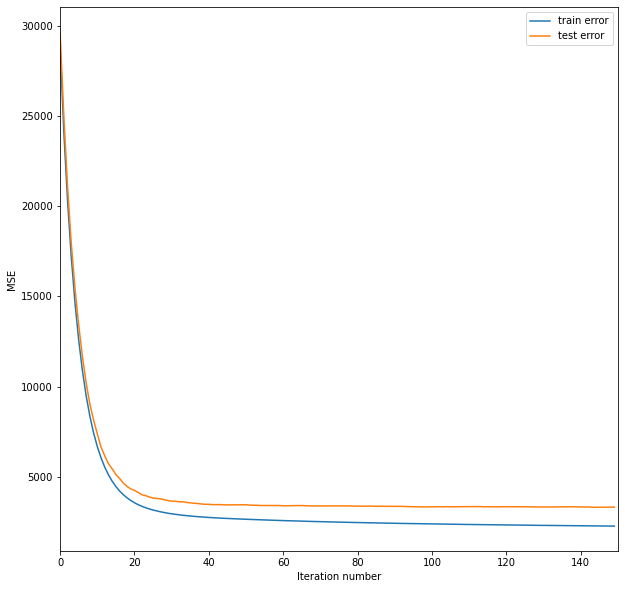

In [48]:
get_error_plot(n_trees, train_errors, test_errors)

In [49]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 150 деревьев глубиной 1     с шагом 0.1 на тренировочной выборке: 2256.8302642246254
Ошибка алгоритма из 150 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 3310.8758613593877


##### В варианте со 150 деревьями и минимальной глубиной = 1, с шагом 0,1 переобучение не наблюдается, модель насыщается на 30 деревьях

In [71]:
n_trees = 30
coefs = [1] * n_trees

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 10

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

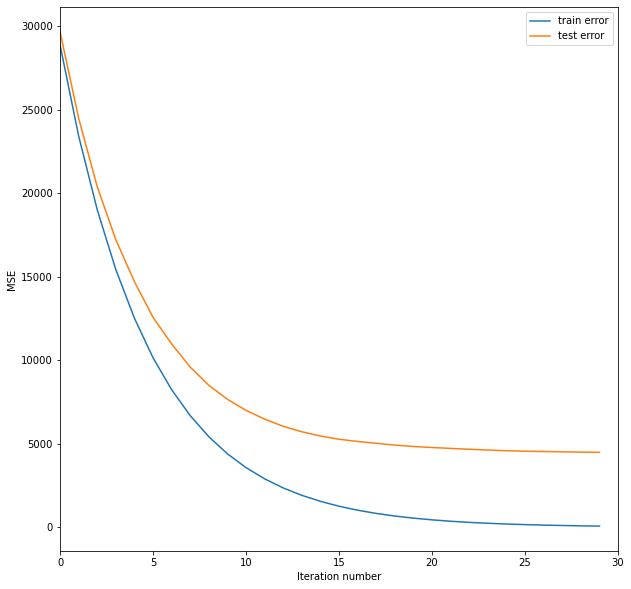

In [72]:
get_error_plot(n_trees, train_errors, test_errors)

In [73]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 54.809685399818086
Ошибка алгоритма из 30 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 4474.3960536165405


#### При увеличении глубины деревьев до 10 при их колличестве = 30, и шаге = 0.1 наступает переобучение. На тестовой выборке ошибка большая, на тренировочной выборке ошибка минимальна

In [74]:
n_trees = 150
coefs = [1] * n_trees

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 10

# Шаг
eta = 0.01

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

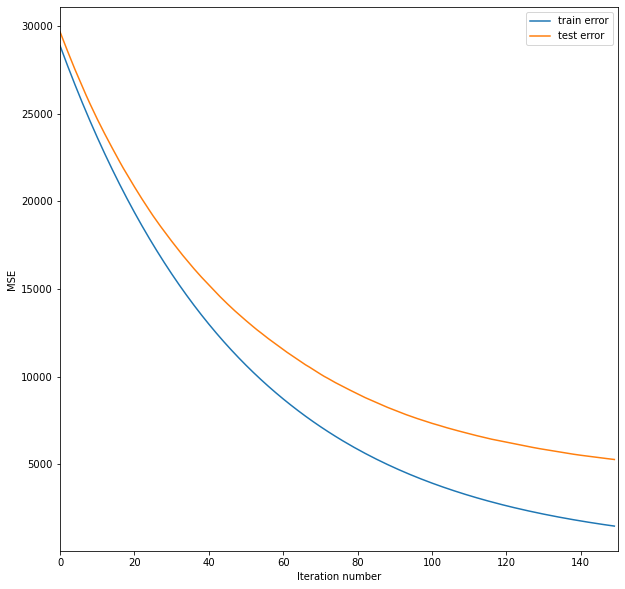

In [75]:
get_error_plot(n_trees, train_errors, test_errors)

In [76]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 150 деревьев глубиной 10     с шагом 0.01 на тренировочной выборке: 1450.6376773671498
Ошибка алгоритма из 150 деревьев глубиной 10     с шагом 0.01 на тестовой выборке: 5252.523302953785


#### Увеличение глубины до 10 и шага до 0,01 при увеличении кол-ва деревьев до 150 также приводит к переобучению и не дает высокого результата по MSE

In [77]:
n_trees = 30
coefs = [1] * n_trees

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 1

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

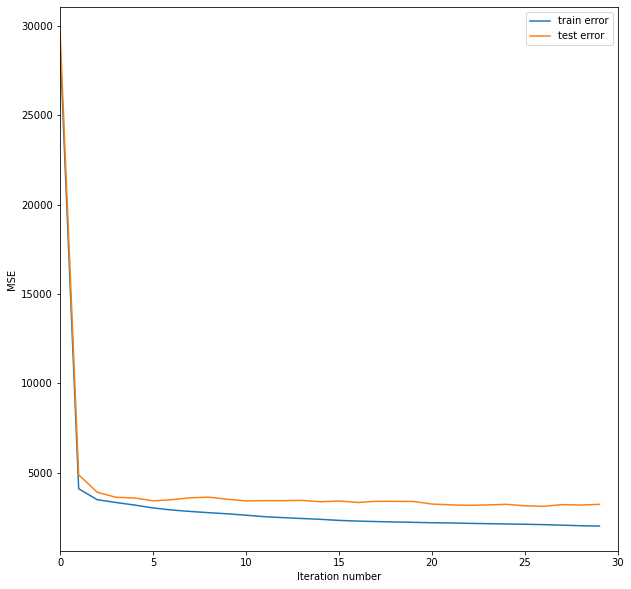

In [78]:
get_error_plot(n_trees, train_errors, test_errors)

In [79]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 30 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 1990.1461932375785
Ошибка алгоритма из 30 деревьев глубиной 1     с шагом 1 на тестовой выборке: 3208.182076689121


#### При 30 деревьях, глубине = 1, шаге = 1, наблюдается самая высокая точность предсказания с минимальным MSE, при этом насыщение модели наступает при 5 деревьях

#### Вывод: Наилучшая точность обучения наблюдается при количестве деревьев, не более чем 10, глубиной = 1, шаге = 1. Повышение глубины и шага приводит к переобучению модели